In [1]:
#imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#contains synergy values and fold split (numbers 0-4)
labels_file_path = "/home/nidhi/Documents/freelancing/DeepSynergy/data/labels.csv"
labels = pd.read_csv( labels_file_path, index_col=0)

#labels are duplicated for the two different ways of ordering in the data
labels = pd.concat([labels, labels]) 

print(labels.head())
print(labels.shape)

                   drug_a_name drug_b_name cell_line   synergy  fold
5-FU_ABT-888_A2058        5-FU     ABT-888     A2058  7.693530     2
5-FU_ABT-888_A2780        5-FU     ABT-888     A2780  7.778053     2
5-FU_ABT-888_A375         5-FU     ABT-888      A375 -1.198505     2
5-FU_ABT-888_A427         5-FU     ABT-888      A427  2.595684     2
5-FU_ABT-888_CAOV3        5-FU     ABT-888     CAOV3 -5.139971     2
(46104, 5)


In [3]:
#grouped by cell_line. This will be used for density plots.
grouped = labels.groupby('cell_line')

for name,group in grouped:
   print(name)
   print(group.shape)

A2058
(1208, 5)
A2780
(1166, 5)
A375
(1208, 5)
A427
(1208, 5)
CAOV3
(1208, 5)
COLO320DM
(1208, 5)
DLD1
(1166, 5)
EFM192B
(1208, 5)
ES2
(1208, 5)
HCT116
(1208, 5)
HT144
(1166, 5)
HT29
(1208, 5)
KPL1
(1166, 5)
LNCAP
(1166, 5)
LOVO
(1208, 5)
MDAMB436
(1166, 5)
MSTO
(1166, 5)
NCIH1650
(1208, 5)
NCIH2122
(1208, 5)
NCIH23
(1208, 5)
NCIH460
(1166, 5)
NCIH520
(1166, 5)
OCUBM
(1166, 5)
OV90
(1166, 5)
OVCAR3
(1166, 5)
PA1
(1208, 5)
RKO
(1166, 5)
RPMI7951
(1166, 5)
SKMEL30
(1166, 5)
SKMES1
(1166, 5)
SKOV3
(1166, 5)
SW620
(1208, 5)
SW837
(1166, 5)
T47D
(1166, 5)
UACC62
(1166, 5)
UWB1289
(1166, 5)
UWB1289BRCA1
(1166, 5)
VCAP
(1166, 5)
ZR751
(1166, 5)


KDE plot

In [5]:
A2058_data = grouped.get_group("A2058")
A2058_data.head()

,drug_a_name,drug_b_name,cell_line,synergy,fold
5-FU_ABT-888_A2058,5-FU,ABT-888,A2058,7.693530,2
5-FU_AZD1775_A2058,5-FU,AZD1775,A2058,13.052687,1
5-FU_BEZ-235_A2058,5-FU,BEZ-235,A2058,13.679112,1
5-FU_BORTEZOMIB_A2058,5-FU,BORTEZOMIB,A2058,-5.239878,2
5-FU_DASATINIB_A2058,5-FU,DASATINIB,A2058,31.125644,1


Plot with bandwidth = 3.589

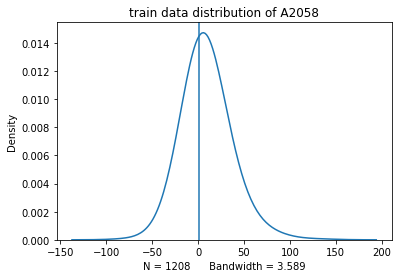

In [6]:
# plot prediction and density plot together
#fake prediction variable.
fake_pred = 1.5  
bandwidth = 3.589
cell_line_name = "A2058"

graph = sns.kdeplot(A2058_data["synergy"], bw_adjust= 3.589)
graph.axvline(fake_pred)
plt.xlabel("N = {0}      Bandwidth = {1}".format(A2058_data.shape[0], bandwidth))
plt.title("train data distribution of {0}".format(cell_line_name))
#plt.savefig("KDE_plot_fixed_bandwidth.png")
plt.show()


KDE Plot with bandwidth calculated by Scipy and Statsmodels.

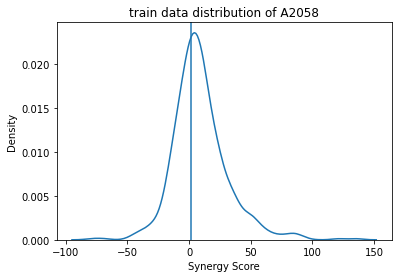

In [7]:
# plot prediction and density plot together
#fake prediction variable.
fake_pred = 1.5  
bandwidth = 3.589
cell_line_name = "A2058"

graph = sns.kdeplot(A2058_data["synergy"])
graph.axvline(fake_pred)
plt.xlabel("Synergy Score")
plt.title("train data distribution of {0}".format(cell_line_name))
#plt.savefig("Training_data_density_plot.png")
plt.show()


Working on Heatmap now.

In [8]:
A2058_data.filter(["drug_a_name","drug_b_name"], axis = 1).reset_index(drop = True).head()
A2058_heatmap_df = A2058_data.filter(["drug_a_name","drug_b_name"], axis = 1)

#print(A2058_data.pivot("drug_a_name","drug_b_name","synergy").head())
#ValueError: Index contains duplicate entries, cannot reshape

In [12]:
#groupby on A2058
A2058_grouped_drugs = A2058_data.groupby(["drug_a_name","drug_b_name"])
duplicate_drug_pairs = 0
# for name,group in grouped_drugs:
#     if group.shape[0] > 1:
#         duplicate_drug_pairs += 1
#         print(name)
#         print(group)

# print(labels.shape[0])  # 46k
# print(duplicate_drug_pairs) # 583

#check if synergy values are same in duplicates
A2058_multiple_synergyscore_drugpairs = 0
for name, group in A2058_grouped_drugs:
    if group["synergy"].nunique() > 1:
        A2058_multiple_synergyscore_drugpairs += 1
        #print(name)
        #print(group)

print(A2058_multiple_synergyscore_drugpairs)

21


In [17]:
#better solution for heatmap. groupby on original labels dataset.
#average synergy scores in duplicate entries. Add them to new df.

grouped_drugs = labels.groupby(["drug_a_name","drug_b_name","cell_line"])

duplicated_labels = pd.DataFrame(columns= ["drug_a_name","drug_b_name", "cell_line"])
duplicates = 0
for name,group in grouped_drugs:
    if group["synergy"].nunique() > 1:
        duplicates += 1
        synergy_mean = group["synergy"].mean()
        
    
    #adding to df


print("Duplicates",duplicates)




5-FU
5-FU
5-FU
5-FU
5-FU
5-FU
5-FU
5-FU
5-FU
5-FU
5-FU
5-FU
5-FU
5-FU
5-FU
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
AZD1775
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
DASATINIB
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
GEMCITABINE
L778123
L778123
L778123
L778123
L778123
L778123
L778123

In [29]:
#grouped_drugs.groups.keys()
keys = [key for key, _ in grouped_drugs]
print(len(keys))

print()


22737


In [30]:
#or add new column in group itself

#better solution for heatmap. groupby on original labels dataset.
#average synergy scores in duplicate entries. Add them to new df.

grouped_drugs = labels.groupby(["drug_a_name","drug_b_name","cell_line"])

for name,group in grouped_drugs:
        group["synergy_mean"] = group["synergy"].mean()
        print(group.shape)
        


(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)
(2, 6)

In [38]:
deduplicated_labels = grouped_drugs["synergy"].mean().reset_index(name = "synergy_mean")
print(deduplicated_labels.nunique)

drug_a_name     22737
drug_b_name     22737
cell_line       22737
synergy_mean    22737
dtype: int64
<bound method DataFrame.nunique of       drug_a_name drug_b_name     cell_line  synergy_mean
0            5-FU     ABT-888         A2058      7.693530
1            5-FU     ABT-888         A2780      7.778053
2            5-FU     ABT-888          A375     -1.198505
3            5-FU     ABT-888          A427      2.595684
4            5-FU     ABT-888         CAOV3     -5.139971
...           ...         ...           ...           ...
22732     ZOLINZA   TOPOTECAN        UACC62     10.223066
22733     ZOLINZA   TOPOTECAN       UWB1289     12.190316
22734     ZOLINZA   TOPOTECAN  UWB1289BRCA1     20.551627
22735     ZOLINZA   TOPOTECAN          VCAP     23.438547
22736     ZOLINZA   TOPOTECAN         ZR751     12.223791

[22737 rows x 4 columns]>


In [32]:
grouped_drugs.get_group(keys[0])

,drug_a_name,drug_b_name,cell_line,synergy,fold
5-FU_ABT-888_A2058,5-FU,ABT-888,A2058,7.69353,2
5-FU_ABT-888_A2058,5-FU,ABT-888,A2058,7.69353,2


In [ ]:
#use existing dictionaries in grouped_drugs to create new df
#dupilcate dict by key

#new df
duplicated_labels = pd.DataFrame(columns= ["drug_a_name","drug_b_name", "cell_line"])

In [ ]:
sns.heatmap(A2058_data.synergy)
sns.color_palette("vlag", as_cmap=True)
plt.show()

IndexError: Inconsistent shape between the condition and the input (got (1208, 1) and (1208,))

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472


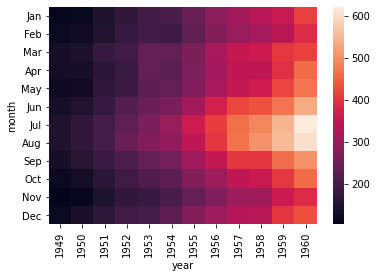

In [ ]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
print(flights.head())
ax = sns.heatmap(flights)